In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.ensemble import ExtraTreesRegressor
from utils import utils_gn, utils_sevsn, utils_noah, utils_models
import importlib
importlib.reload(utils_gn)
importlib.reload(utils_sevsn)
importlib.reload(utils_noah)
importlib.reload(utils_models)
warnings.filterwarnings('ignore')

In [2]:
# read the data
df_raw = (utils_gn.read_data('severson_all.pkl')).drop('cycle_life', axis=1).join(utils_gn.read_data('noah_all.pkl'))
df = df_raw.copy()
df.head()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
b1c0,-0.002873,-2.541602,0.000010,-5.014861,-0.008460,-2.072648,-0.532058,-0.274041,1.651688,0.217928,...,-0.005402,0.003024,-79.299389,-75.009448,-67.092799,12.206590,3.626709,0.000388,-0.000031,1851.0
b1c1,-0.004100,-2.387257,0.000010,-5.013960,-0.011004,-1.958457,-0.429375,-0.367163,1.970884,0.294661,...,0.001894,0.000708,-75.511329,-73.411862,-63.284437,12.226892,8.027959,0.000396,-0.000019,2159.0
b1c2,-0.004487,-2.348070,0.000018,-4.737000,-0.017216,-1.764058,-1.080194,0.033502,3.348637,0.524868,...,-0.003083,0.006358,-76.601709,-73.345940,-65.473419,11.128290,4.616753,0.000312,-0.000013,2236.0
b1c3,-0.007456,-2.127507,0.000036,-4.442613,-0.018961,-1.722149,-0.439050,-0.357486,1.904584,0.279800,...,-0.000753,0.013632,-80.446334,-67.731448,-54.750980,25.695354,0.265582,0.000353,-0.000013,1433.0
b1c4,-0.005750,-2.240332,0.000023,-4.647744,-0.013958,-1.855177,-0.362548,-0.440634,1.666169,0.221719,...,0.002110,0.000972,-75.575598,-65.232594,-55.380306,20.195292,-0.490716,0.000347,-0.000030,1708.0


In [3]:
df.index

Index(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9',
       'b1c11',
       ...
       'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41', 'b3c42', 'b3c43',
       'b3c44', 'b3c45'],
      dtype='object', length=124)

In [4]:
df.columns

Index(['mean_Q_100_10', 'log_mean_Q_100_10', 'var_Q_100_10',
       'log_var_Q_100_10', 'min_Q_100_10', 'log_min_Q_100_10', 'skew_Q_100_10',
       'log_skew_Q_100_10', 'kurt_Q_100_10', 'log_kurt_Q_100_10',
       ...
       'dVdQpeak_maxmag_di_y_100m0', 'dVdQpeak_maxmag_di_y_diff',
       'dVdQpeak_maxarea_di_y_0', 'dVdQpeak_maxarea_di_y_50',
       'dVdQpeak_maxarea_di_y_100', 'dVdQpeak_maxarea_di_y_100m0',
       'dVdQpeak_maxarea_di_y_diff', 'dSOHdCycCyc1', 'dSOHdCycCyc100',
       'cycle_life'],
      dtype='object', length=245)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, b1c0 to b3c45
Columns: 245 entries, mean_Q_100_10 to cycle_life
dtypes: float64(245)
memory usage: 242.4+ KB


In [6]:
df.describe()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,...,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,-0.018901,-1.795793,0.000223,-3.835354,-0.040760,-1.440500,-0.103301,-0.777828,1.857125,0.261912,...,-0.001076,0.006009,-86.421878,-61.174991,-46.732521,40.020633,-11.299493,0.000265,-0.000069,807.241935
std,0.011347,0.270904,0.000262,0.411134,0.020373,0.217995,0.330102,0.425974,0.454478,0.067593,...,0.046340,0.046048,11.467643,12.863652,6.009183,10.017040,20.110534,0.000136,0.000137,364.359118
min,-0.077684,-3.105396,0.000010,-5.014861,-0.138026,-2.251053,-1.080194,-2.337813,1.612805,0.207582,...,-0.040512,-0.049829,-112.994264,-88.677648,-69.082990,0.491715,-84.612442,-0.000126,-0.001108,170.000000
25%,-0.024233,-1.950487,0.000077,-4.114970,-0.052091,-1.573442,-0.285918,-0.976312,1.710361,0.233088,...,-0.008373,-0.002406,-92.562247,-71.707141,-48.490348,36.962135,-26.034615,0.000190,-0.000065,525.750000
50%,-0.017671,-1.752752,0.000168,-3.775169,-0.038753,-1.411715,-0.141639,-0.713148,1.761561,0.245898,...,-0.005440,0.000974,-86.660594,-59.687399,-45.281185,41.260141,-6.184834,0.000246,-0.000038,743.000000
75%,-0.011208,-1.615590,0.000298,-3.526121,-0.026703,-1.283235,-0.001193,-0.472983,1.866319,0.270984,...,-0.002228,0.005188,-82.555981,-50.581414,-42.951827,46.879305,4.543194,0.000336,-0.000025,945.500000
max,0.000785,-1.109668,0.001875,-2.726901,-0.005610,-0.860038,1.986572,0.298104,5.920243,0.772340,...,0.491715,0.491715,0.491715,-21.537204,-35.616237,61.973190,23.766408,0.000990,0.000211,2236.000000


In [7]:
# prune cells with more than 1250 cycle life
df = df[df['cycle_life'] <= 1250]
df.index

Index(['b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16',
       'b1c17', 'b1c18',
       ...
       'b3c29', 'b3c30', 'b3c31', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41',
       'b3c43', 'b3c44'],
      dtype='object', length=113)

In [8]:
# define paramters to use
test_size= 0.2
params= {"n_estimators": 500,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "squared_error"}

### Extratrees regression without scaling and feature selection

Tree-based regression has started...
Tree-based regression has ended after 0.64 seconds
------------------
Model metrics:
------------------
{'MAE': 56.67785922958784,
 'MAPE': 0.08338698372929775,
 'MSE': 4936.501360678939,
 'R2 score': 0.9097928718519879,
 'RMSE': 70.26024025491898}


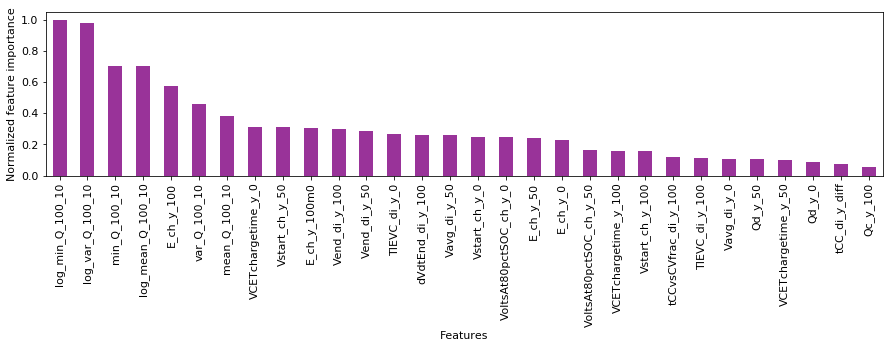

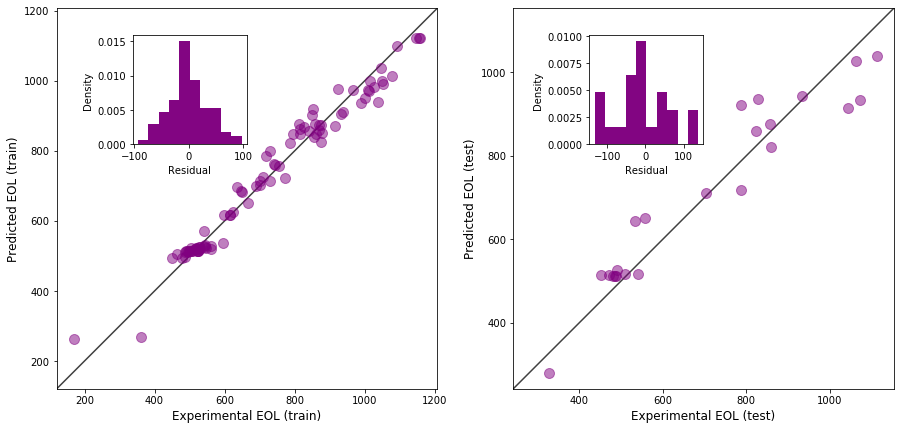

In [9]:
model, metrics = utils_models.fit_tree_based_regression(df=df,
                                                        test_size=test_size,
                                                        feature_selection=False,
                                                        scaling=False,
                                                        params=params,
                                                        plot=True,
                                                        fname='extratrees_model',
                                                        model_type='ext')

### Extratrees regression with scaling but without feature selection

Tree-based regression has started...
Tree-based regression has ended after 0.63 seconds
------------------
Model metrics:
------------------
{'MAE': 56.02736125627565,
 'MAPE': 0.08262964708327765,
 'MSE': 4884.8873945847745,
 'R2 score': 0.9107360393533219,
 'RMSE': 69.89196945704688}


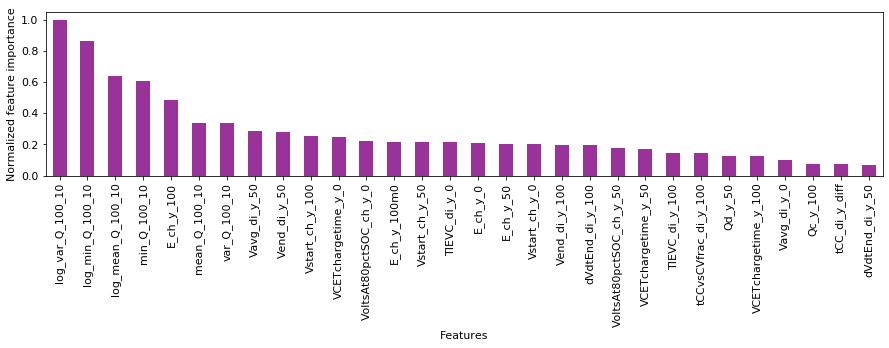

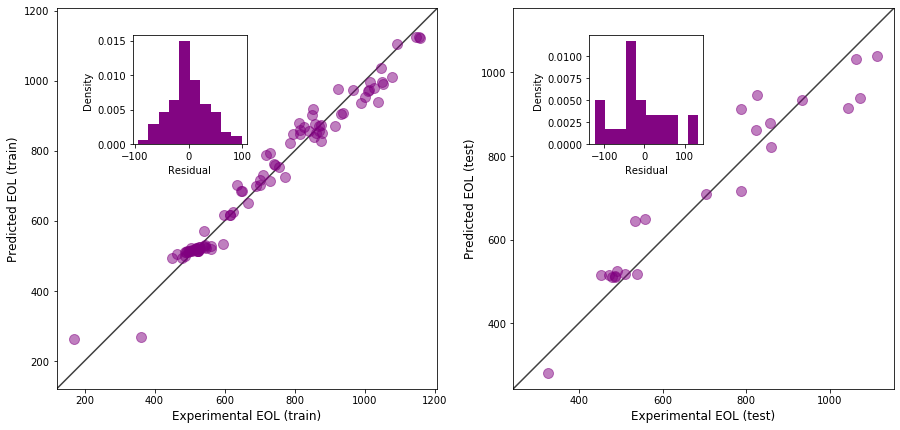

In [10]:
# call Extratrees regression function with scaling and feature selection
model, metrics  = utils_models.fit_tree_based_regression(df=df,
                                                        test_size=test_size,
                                                        feature_selection=False,
                                                        scaling=True,
                                                        params=params,
                                                        plot=True,
                                                        fname='extratrees_model_scaled',
                                                        model_type='ext')

### Extratrees regression with feature selection but without scaling with $k=0.5, 0.6, 0.7, 0.8, 0.9$

In [11]:
# define a list of k
k_list = [0.9, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2]

Fitting model with 90 percent of features...
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.67 seconds
------------------
Model metrics:
------------------
{'MAE': 55.14104215642983,
 'MAPE': 0.08127335863667227,
 'MSE': 4602.4396027799,
 'R2 score': 0.9158973473909158,
 'RMSE': 67.84128243761242}


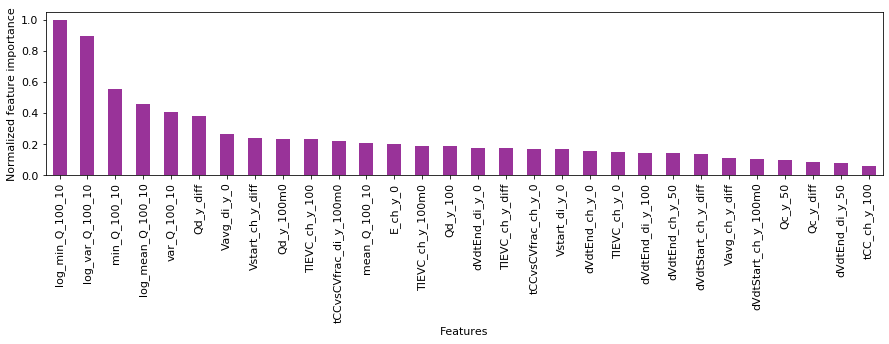

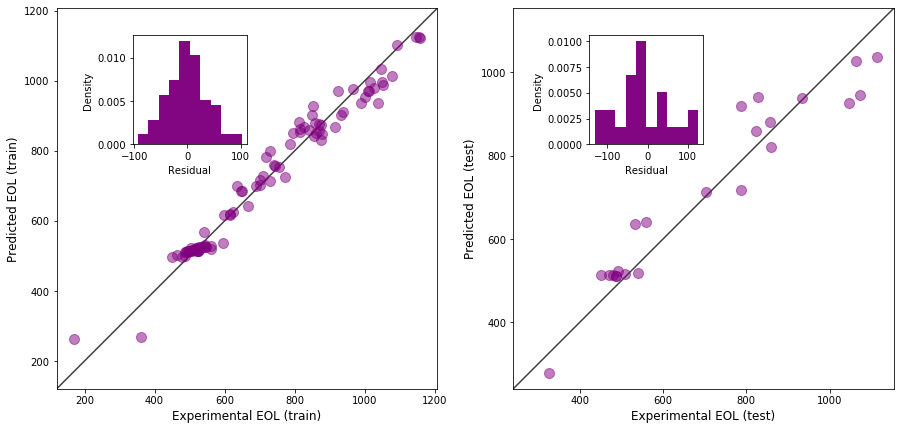

Fitting model with 80 percent of features...
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.63 seconds
------------------
Model metrics:
------------------
{'MAE': 54.633114447432895,
 'MAPE': 0.08092542954309767,
 'MSE': 4620.646454190225,
 'R2 score': 0.9155646446003474,
 'RMSE': 67.97533710243904}


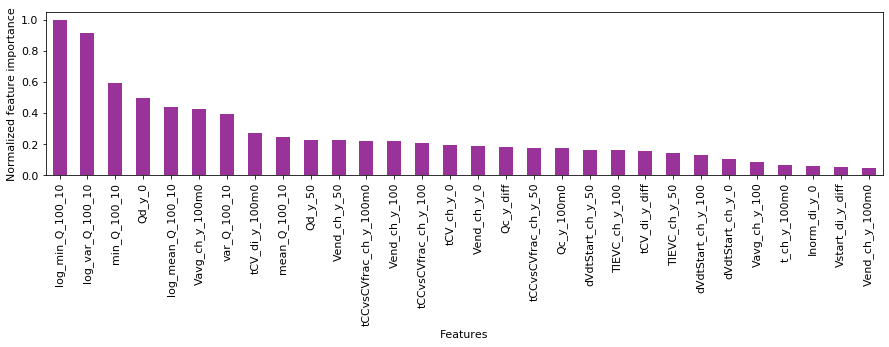

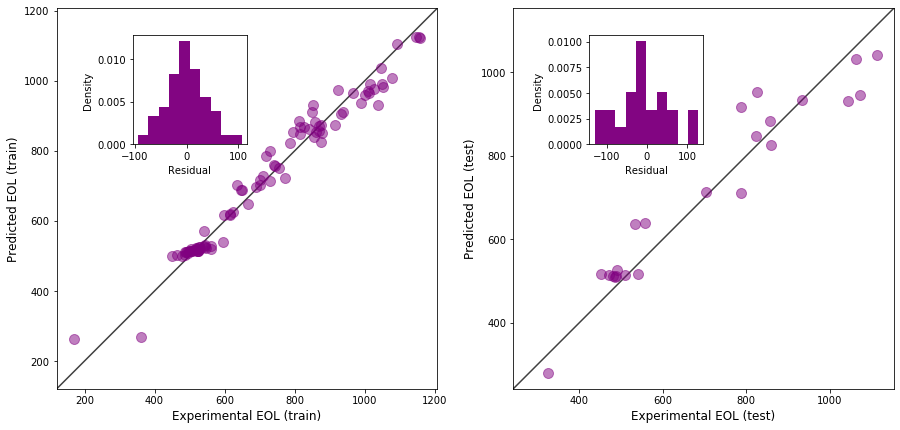

Fitting model with 60 percent of features...
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.56 seconds
------------------
Model metrics:
------------------
{'MAE': 53.282870066182575,
 'MAPE': 0.07900038421124207,
 'MSE': 4333.314340508459,
 'R2 score': 0.9208152062646037,
 'RMSE': 65.82791459941944}


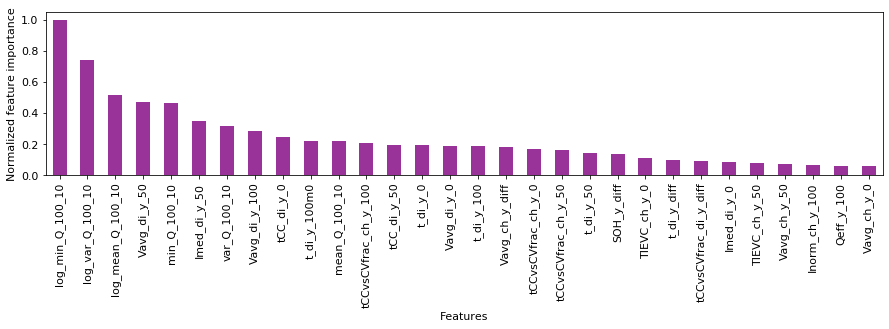

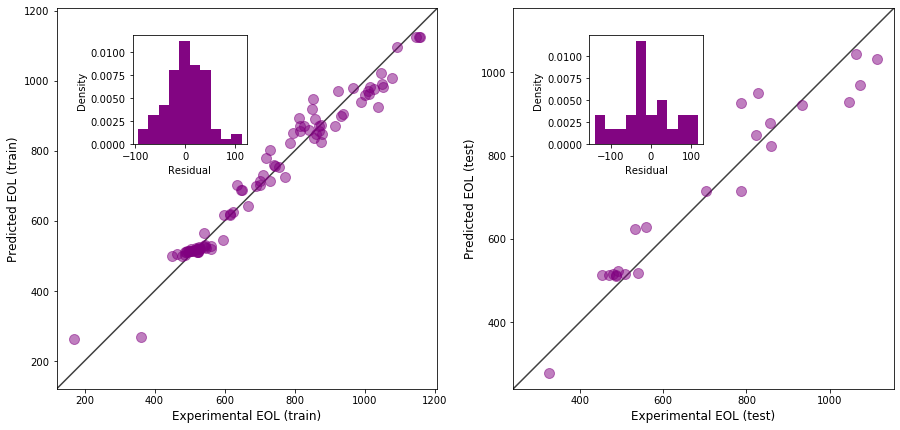

Fitting model with 50 percent of features...
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.56 seconds
------------------
Model metrics:
------------------
{'MAE': 51.67091331094109,
 'MAPE': 0.07679894702183195,
 'MSE': 4102.136727727934,
 'R2 score': 0.9250396289918318,
 'RMSE': 64.04792524139977}


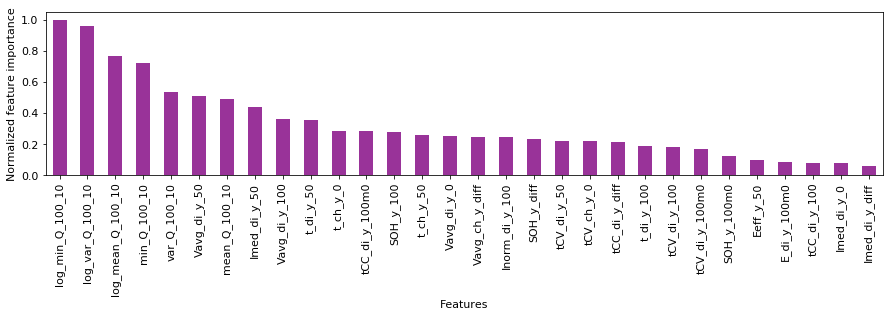

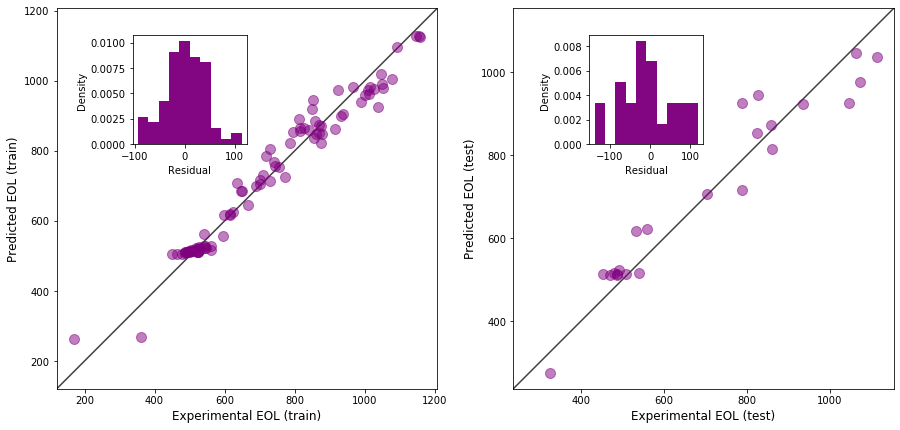

Fitting model with 40 percent of features...
147 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.53 seconds
------------------
Model metrics:
------------------
{'MAE': 51.57413465717281,
 'MAPE': 0.07652107306332287,
 'MSE': 4082.9745687717186,
 'R2 score': 0.9253897885891378,
 'RMSE': 63.89815778856006}


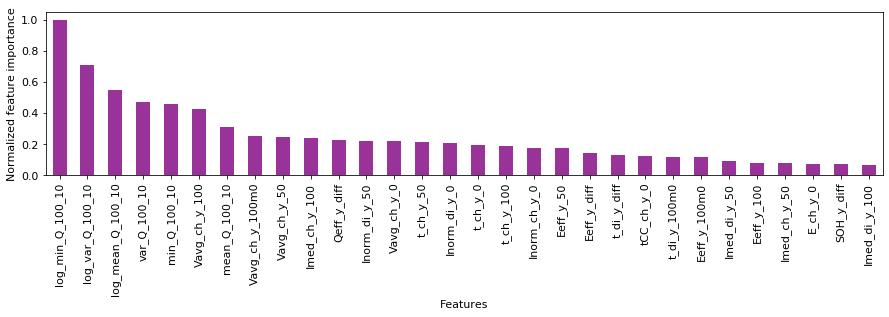

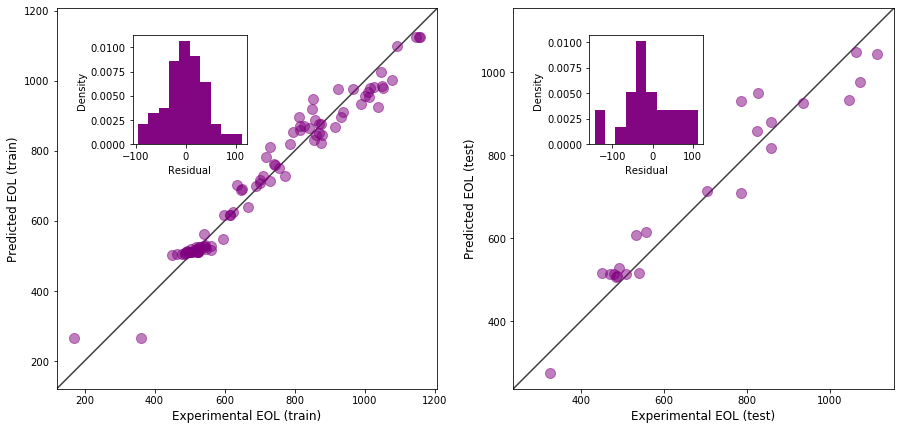

Fitting model with 30 percent of features...
171 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.53 seconds
------------------
Model metrics:
------------------
{'MAE': 51.46829818410517,
 'MAPE': 0.0760612633752793,
 'MSE': 4137.544781271573,
 'R2 score': 0.9243926001367554,
 'RMSE': 64.32374974511026}


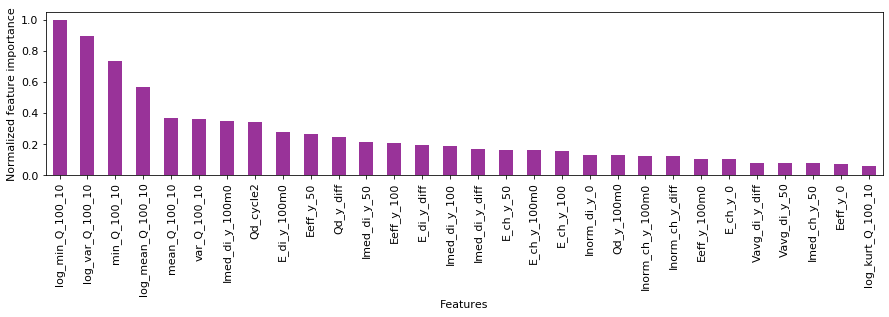

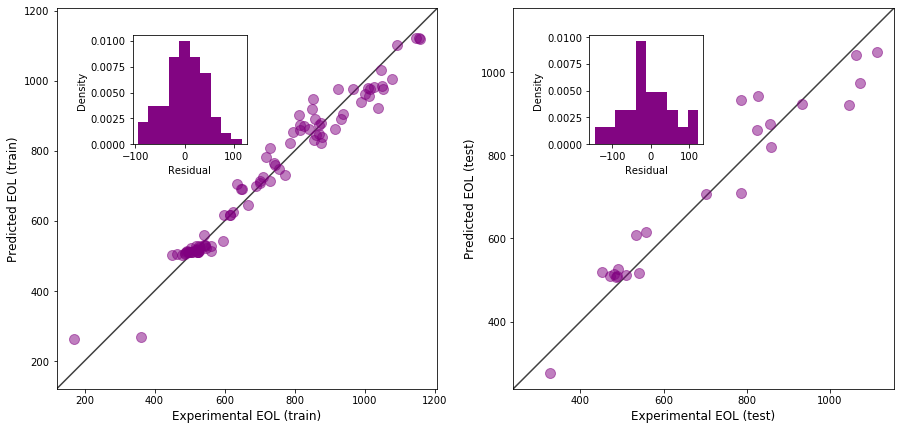

Fitting model with 20 percent of features...
196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.6 seconds
------------------
Model metrics:
------------------
{'MAE': 52.69658668064325,
 'MAPE': 0.07530620030096373,
 'MSE': 4641.484856705797,
 'R2 score': 0.915183854176365,
 'RMSE': 68.128443815383}


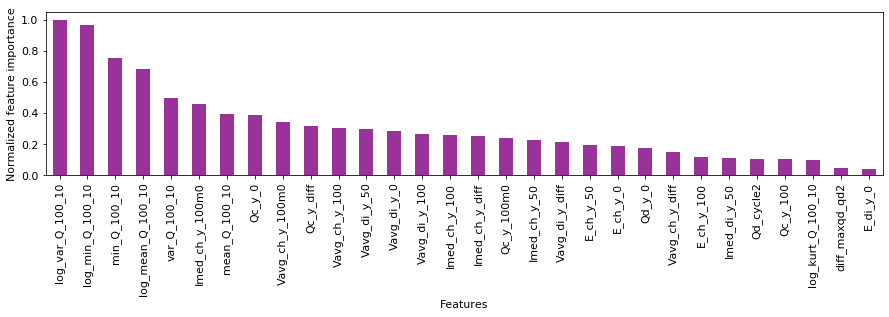

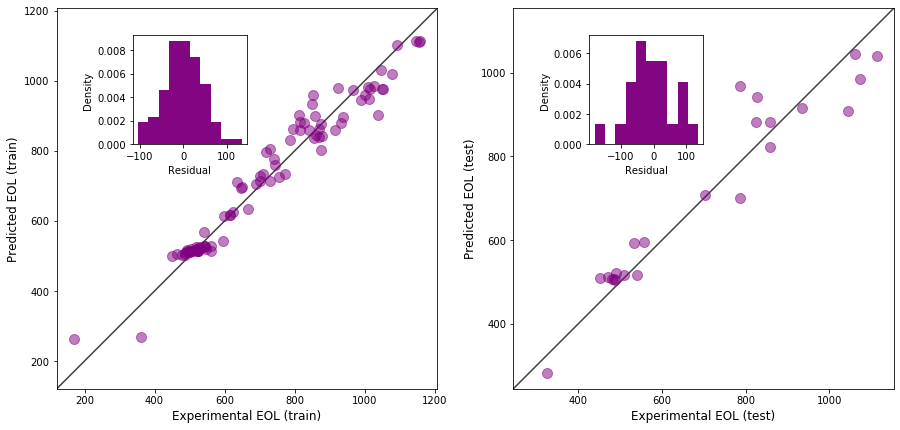

,MAE,MAPE,MSE,RMSE,R2 score
Features used (%),,,,,
90.0,55.141042,0.081273,4602.439603,67.841282,0.915897
80.0,54.633114,0.080925,4620.646454,67.975337,0.915565
60.0,53.282870,0.079000,4333.314341,65.827915,0.920815
50.0,51.670913,0.076799,4102.136728,64.047925,0.925040
40.0,51.574135,0.076521,4082.974569,63.898158,0.925390
30.0,51.468298,0.076061,4137.544781,64.323750,0.924393
20.0,52.696587,0.075306,4641.484857,68.128444,0.915184


In [12]:
# call Extratrees regression function with feature selection using different k
metric_list = []

for k in k_list:
    print('Fitting model with {} percent of features...'.format(int(k*100)))
    model, metrics = utils_models.fit_tree_based_regression(df=df,
                                                            test_size=test_size,
                                                            feature_selection=True,
                                                            scaling=False,
                                                            params=params,
                                                            plot=True,
                                                            fname='extratrees_model_ftselection_k_'+str(int(k*100)),
                                                            model_type='ext',
                                                            k=k)
    metric_list.append(list(metrics.values()))

metric_data = pd.DataFrame(data=np.array(metric_list), columns=metrics.keys(), index=np.array(k_list)*100)
metric_data.index.name = 'Features used (%)'
metric_data

### Extratrees regression with feature selection and scaling with $k=0.5, 0.6, 0.7, 0.8, 0.9$

Fitting model with 90 percent of features...
25 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 1.39 seconds
------------------
Model metrics:
------------------
{'MAE': 56.32637831134566,
 'MAPE': 0.08266097626536342,
 'MSE': 4800.656242283204,
 'R2 score': 0.9122752368121225,
 'RMSE': 69.28676816162812}


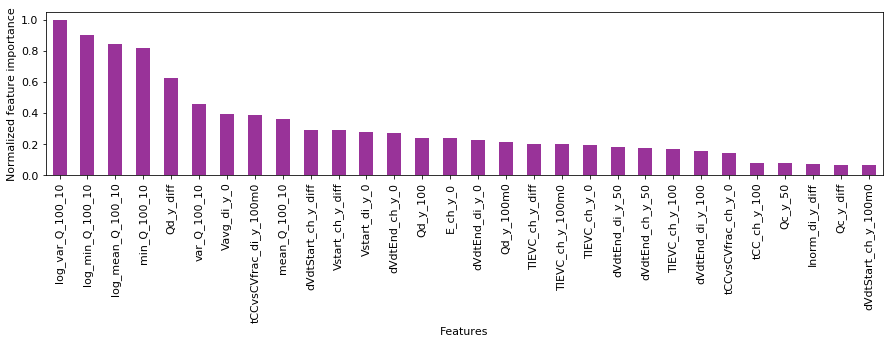

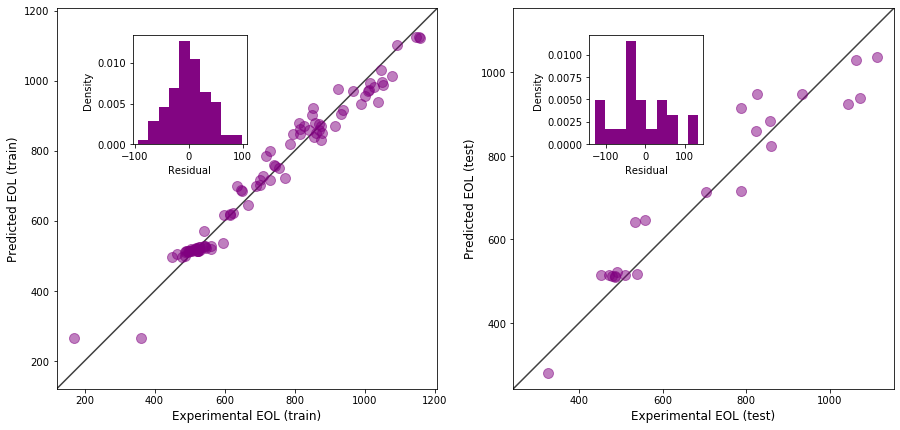

Fitting model with 80 percent of features...
49 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 1.41 seconds
------------------
Model metrics:
------------------
{'MAE': 54.57825898947491,
 'MAPE': 0.08064247414155033,
 'MSE': 4651.699840267506,
 'R2 score': 0.9149971907352241,
 'RMSE': 68.20337117963822}


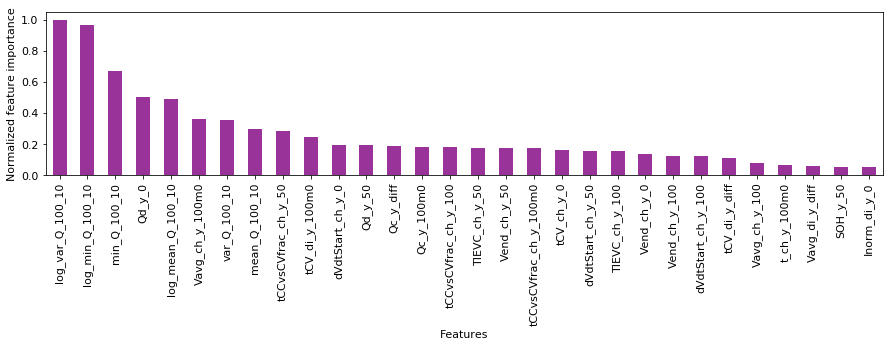

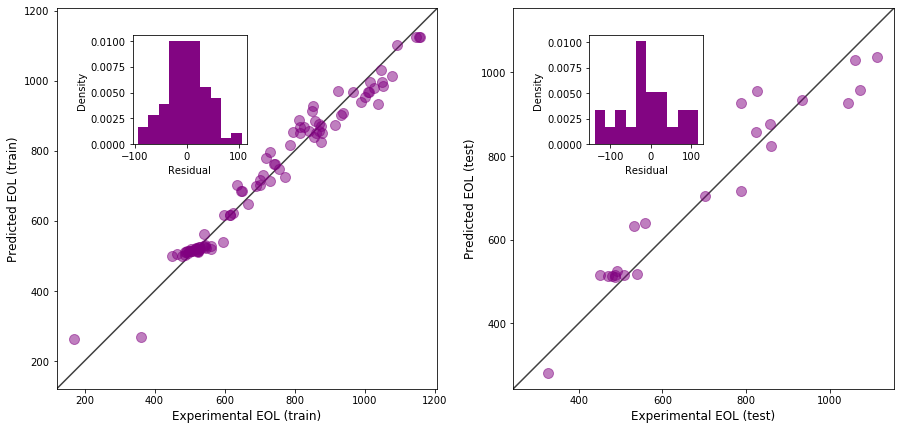

Fitting model with 60 percent of features...
98 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 1.15 seconds
------------------
Model metrics:
------------------
{'MAE': 52.513924934527516,
 'MAPE': 0.07809944107178264,
 'MSE': 4198.258326046677,
 'R2 score': 0.9232831515387114,
 'RMSE': 64.79396828445282}


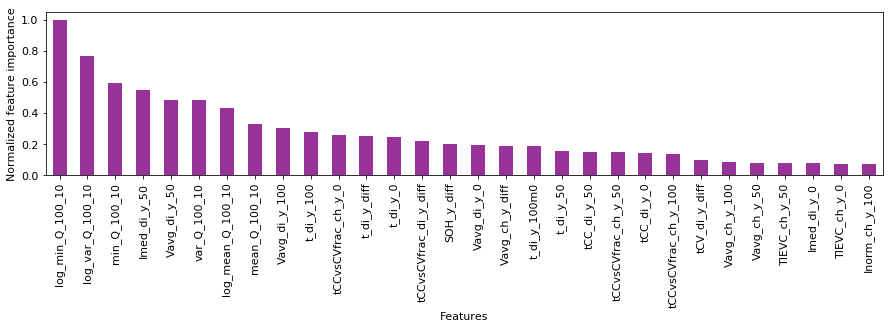

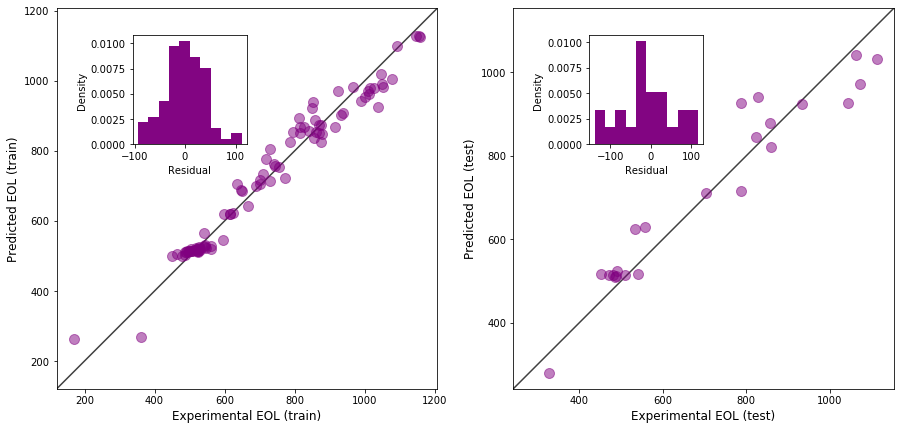

Fitting model with 50 percent of features...
122 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 1.34 seconds
------------------
Model metrics:
------------------
{'MAE': 51.22743430705575,
 'MAPE': 0.07614942125124645,
 'MSE': 4177.186859858184,
 'R2 score': 0.9236682008503296,
 'RMSE': 64.63116013083925}


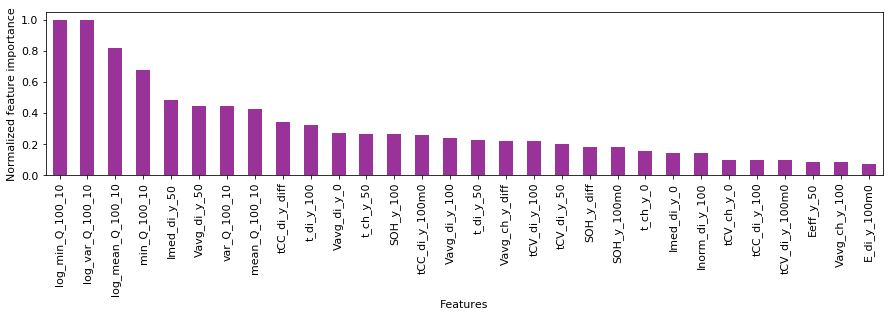

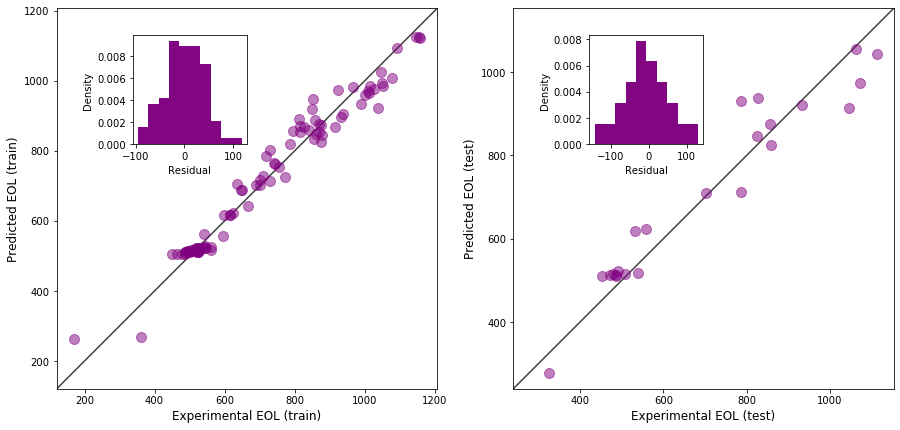

Fitting model with 40 percent of features...
147 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 1.25 seconds
------------------
Model metrics:
------------------
{'MAE': 52.12082634024591,
 'MAPE': 0.07759591410410226,
 'MSE': 4158.910464589827,
 'R2 score': 0.9240021744501727,
 'RMSE': 64.48961516856669}


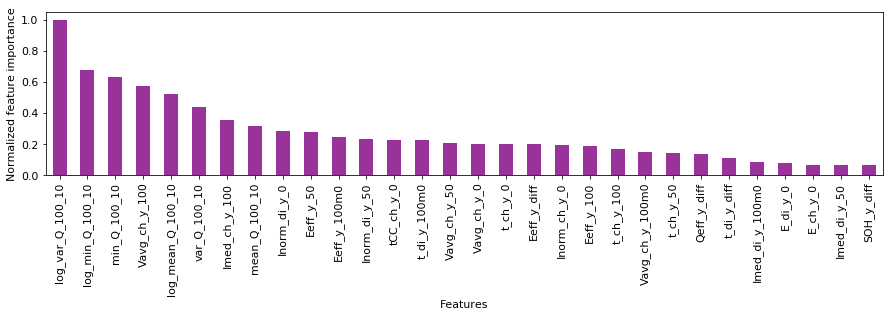

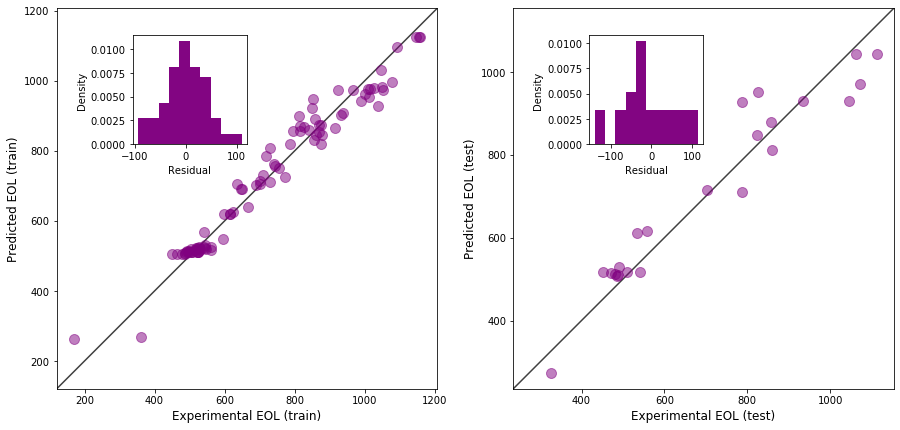

Fitting model with 30 percent of features...
171 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 1.51 seconds
------------------
Model metrics:
------------------
{'MAE': 51.92862718554374,
 'MAPE': 0.07685911045739202,
 'MSE': 4156.655983392922,
 'R2 score': 0.9240433716988672,
 'RMSE': 64.47213338639355}


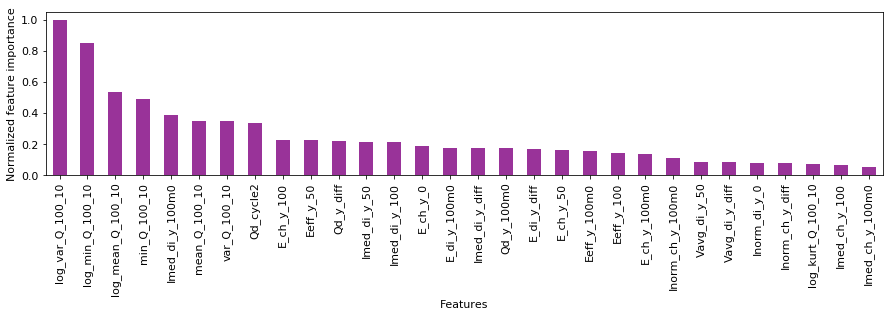

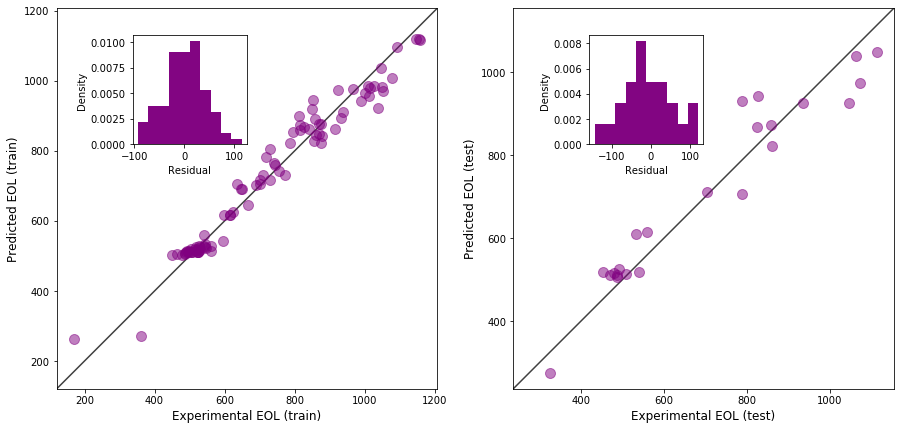

Fitting model with 20 percent of features...
196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 1.18 seconds
------------------
Model metrics:
------------------
{'MAE': 52.92799243406823,
 'MAPE': 0.07591415243950214,
 'MSE': 4602.526140034961,
 'R2 score': 0.915895766052902,
 'RMSE': 67.84192022661918}


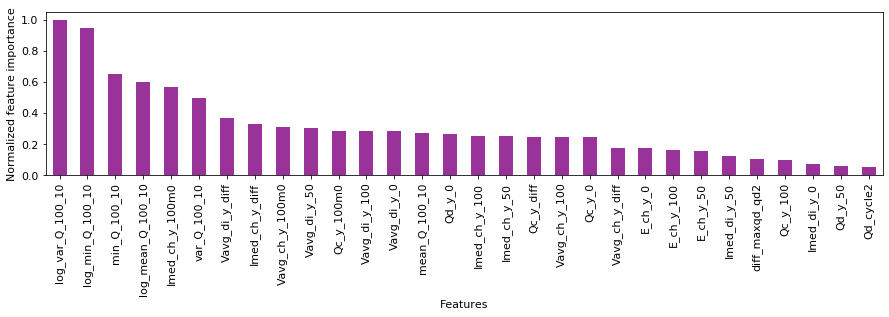

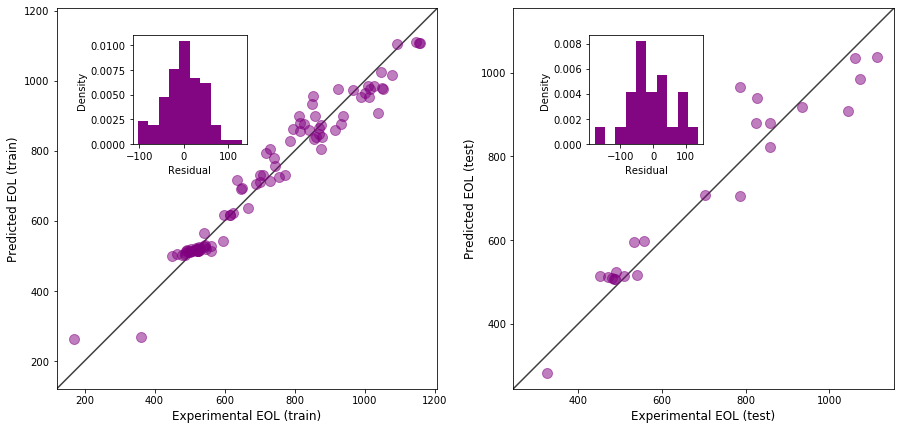

,MAE,MAPE,MSE,RMSE,R2 score
Features used (%),,,,,
90.0,56.326378,0.082661,4800.656242,69.286768,0.912275
80.0,54.578259,0.080642,4651.699840,68.203371,0.914997
60.0,52.513925,0.078099,4198.258326,64.793968,0.923283
50.0,51.227434,0.076149,4177.186860,64.631160,0.923668
40.0,52.120826,0.077596,4158.910465,64.489615,0.924002
30.0,51.928627,0.076859,4156.655983,64.472133,0.924043
20.0,52.927992,0.075914,4602.526140,67.841920,0.915896


In [13]:
# call Extratrees regression function with feature selection and scaling using different k
metric_list = []

for k in k_list:
    print('Fitting model with {} percent of features...'.format(int(k*100)))
    model, metrics = utils_models.fit_tree_based_regression(df=df,
                                                            test_size=test_size,
                                                            feature_selection=True,
                                                            scaling=True,
                                                            params=params,
                                                            plot=True,
                                                            fname='extratrees_model_ftselection_scaled_k_'+str(int(k*100)),
                                                            model_type='ext',
                                                            k=k)
    metric_list.append(list(metrics.values()))

metric_data = pd.DataFrame(data=np.array(metric_list), columns=metrics.keys(), index=np.array(k_list)*100)
metric_data.index.name = 'Features used (%)'
metric_data

### Perform $k$-Fold Repeated Cross-validation on the best model

In [14]:
# the best model here uses less features and excelled in MAPE: feature_selection=True, k=0.2
model = ExtraTreesRegressor(**params)
best_model_cross_val_scores = utils_models.repeated_kfold_cross_validation(model=model,
                                                                           df=df,
                                                                           n_splits=3,
                                                                           n_repeats=3,
                                                                           feature_selection=True,
                                                                           scaling=False,
                                                                           k=0.2)

best_model_cross_val_scores

196 features removed from a total of 244


{'test_MAE': (58.444420687974265, 8.385933176501899),
 'test_MAPE': (0.09006602799189335, 0.026598134637706567),
 'test_MSE': (6284.023563673172, 2065.030486645947),
 'test_R2 score': (0.8676842400685553, 0.03701189350510787)}

### Hyper-parameter tuning

In [9]:
estimator = ExtraTreesRegressor()
param_grid = {"n_estimators": [100, 200, 300, 400, 500, 1000],
                    "max_depth": [2, 3, 4, 5],
                    "min_samples_split": [2, 3, 4, 5]}
scoring = 'neg_mean_absolute_percentage_error'
cv = 3

# for the model without feature selection
utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=False, k=None)

({'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200},
 -0.11293044051282042)

In [10]:
# for the model with feature selection
utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=True, k=0.2)

196 features removed from a total of 244


({'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200},
 -0.09957221740810938)

### Use the best hyper-parameter to rebuild the models and carry out repeated $k$-fold cross-validation

In [15]:
best_param_all = {'max_depth': 5,
                  'min_samples_split': 5,
                  'n_estimators': 200}

best_param_selected = {'max_depth': 5,
                       'min_samples_split': 2,
                       'n_estimators': 200}

Tree-based regression has started...
Tree-based regression has ended after 0.34 seconds
------------------
Model metrics:
------------------
{'MAE': 54.57705959318179,
 'MAPE': 0.07922822901563109,
 'MSE': 4657.423168717608,
 'R2 score': 0.9148926055269542,
 'RMSE': 68.24531609361632}


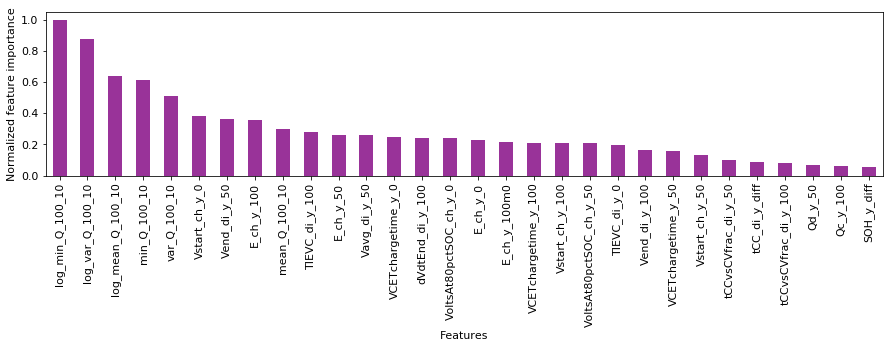

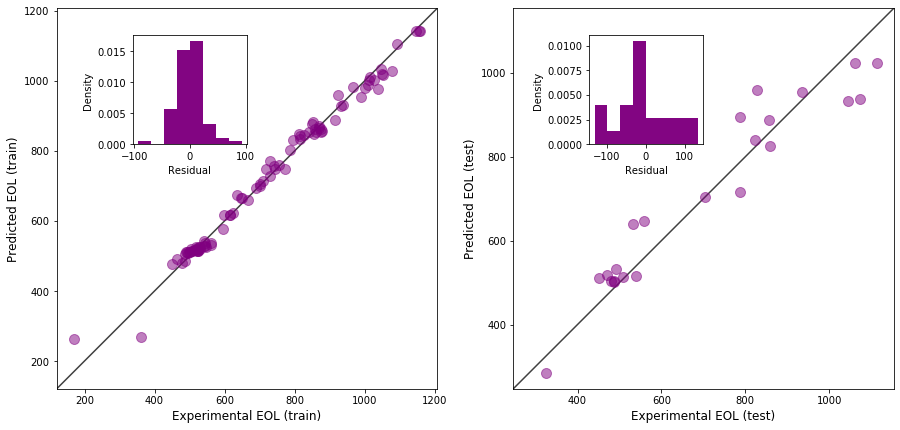

In [16]:
# for the model using all the features 
best_model_all, metrics_all = utils_models.fit_tree_based_regression(df=df,
                                                                    test_size=test_size,
                                                                    feature_selection=False,
                                                                    scaling=False,
                                                                    params=best_param_all,
                                                                    plot=True,
                                                                    fname='best_all_features_ext_model',
                                                                    model_type='ext')

196 features removed from a total of 244
Tree-based regression has started...
Tree-based regression has ended after 0.33 seconds
------------------
Model metrics:
------------------
{'MAE': 49.640905251430766,
 'MAPE': 0.07011151511721765,
 'MSE': 4468.015950456832,
 'R2 score': 0.9183537371992563,
 'RMSE': 66.84321918083263}


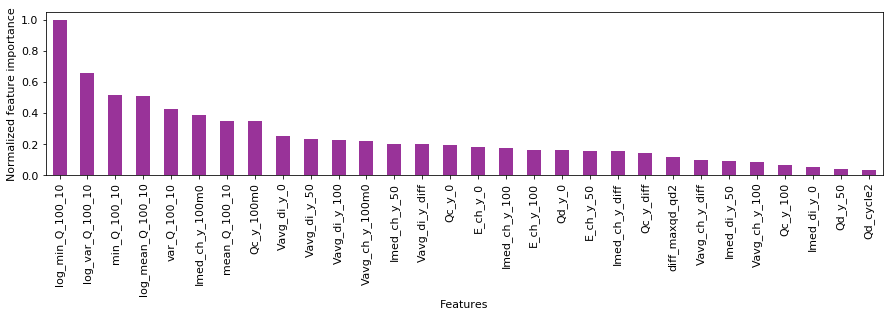

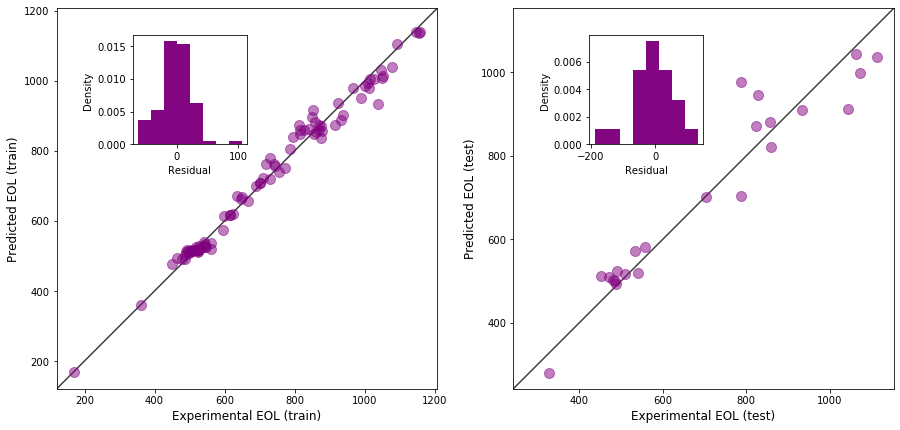

In [17]:
# for the model using selected features 
best_model_selected, metrics_selected = utils_models.fit_tree_based_regression(df=df,
                                                                               test_size=test_size,
                                                                               feature_selection=True,
                                                                               scaling=False,
                                                                               params=best_param_selected,
                                                                               plot=True,
                                                                               fname='best_selected_features_ext_model',
                                                                               model_type='ext',
                                                                               k=0.2)

In [18]:
# Repeated k-fold cross-validation for the model obtained from grid search and using all features
model = ExtraTreesRegressor(**best_param_all)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=False,
                                            scaling=False)



{'test_MAE': (57.70830981499493, 9.887324247649678),
 'test_MAPE': (0.0900332414955457, 0.02808098544374846),
 'test_MSE': (6211.646852511353, 2621.95436870442),
 'test_R2 score': (0.8695306717772691, 0.04880922803524594)}

In [19]:
# Repeated k-fold cross-validation for the model obtained from grid search and using selected features
model = ExtraTreesRegressor(**best_param_selected)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=True,
                                            scaling=False,
                                            k=0.2)



196 features removed from a total of 244


{'test_MAE': (56.86198418708338, 9.217235137258097),
 'test_MAPE': (0.08738773921296067, 0.026462586647737926),
 'test_MSE': (6100.394770820573, 2063.5299197983245),
 'test_R2 score': (0.8713424424071421, 0.038448654121102085)}